# Condition monitoring of hydraulic systems
Objecttive of this assignment is to check weather operating parameters of test rig(Hydraulic System) are withing limit or not and thus predicting the condition using machine learning classification algorithm.Hydraulic test rig consists of 4 functional units(cooler, valve, pump and accumulator)  and these mechanical components are assessed  by 8 physical quantities(Pressure,Motor power,Volume flow,Temperature,Vibration,Efficiency factor,Virtual cooling efficiency,Virtual cooling power) and these quantities are measured by respective sensors at different rates like,reading/sec,10 reading/sec,100 reading/sec.

In [478]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# imports for Model
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm.classes import SVC
from sklearn.tree.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

#import for scaling the features
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# imports for models metrics to check the accuracy
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

# Data loading and preprocessing
We are having 2205 records and 5 attributes # df.shape=(2205, 5),
we will asses the condition of hydraulic test rig using machine learning classification algorithm like Logistic Regression and Support Vector Machine(SVM) as there are only two outcome classes as "Test rig is OK" or "Test rig is NOT OK". This would be off line machine learning implementation that is model will be trained on given dataset  which was collected in past  but prediction would be  LIVE.Predictions would be Demonstrated through jupyter notebook with similar distribution dataset,extension to this work would be if we publish REST service using python framework and implemented corresponding UI
0. Reindexed the full dataframe to avoid some sequnce or sorting/odering of data to train the model correctly and avoid some overfitting
1. Three columns "Cooler Condition","Valve Condition","Hydraulic Accumulator" are divided by 100 to make them unified in scaling
2. All values are normalized between range 0-2
3. Histograms are plotted for all columns to just see the data distibution 
4. #


In [545]:
extracted_features_path="D:\ML_AI_Study\Datasets\condition_monitoring_of_hydraulic_systems\extracted_features.csv"
df=pd.read_csv(extracted_features_path,sep=",")
df=df.reindex(np.random.permutation(df.index))
#df.shape

Columns_ToBe_Transform=["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator"]
df["Cooler Condition"]=df["Cooler Condition"]/100
df["Valve Condition"]=df["Valve Condition"]/100
df["Hydraulic Accumulator"]=df["Hydraulic Accumulator"]/100
#Histograms for all columns
'''
for col in df.columns:
    df[col].hist()
    plt.xlabel(col)
    plt.show()
'''
df.head()
#train, validate, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#train.shape

,Cooler Condition,Valve Condition,Internal Pump Leakage,Hydraulic Accumulator,OK_NOT_OK
1739,1.00,0.90,1,1.30,0
374,0.03,1.00,2,1.15,0
670,0.03,0.80,1,0.90,0
1593,1.00,1.00,0,0.90,1
1762,1.00,0.73,0,1.30,0


seaborn boxplots are used to check if is there any outlier
1. we do not found any outlier
2. Boxplots are working on theory of IQR(The interquartile range).
3. IQR is a measure of variability, based on dividing a data set into quartiles. Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.)

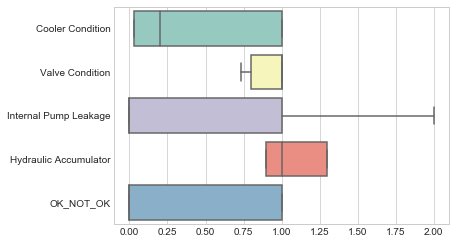

In [480]:
sb.set_style("whitegrid")
ax = sb.boxplot(data=df, orient="h", palette="Set3")
plt.show()

Finally dropped the label column from dataframe and formed data and label to be used for further data processing
1. 80% data is used to train the model
2. 20% data will used to test the accuracy and to predict the results of model

In [518]:
data=np.array(df.drop(["OK_NOT_OK"],axis=1))
label=np.array(df["OK_NOT_OK"])

data_train,data_test,label_train,label_test=train_test_split(data,label,test_size=0.2)

#data_train, X_val, label_train, y_val = train_test_split(data_train, label_train, test_size=0.1, random_state=1)

#classifier=LinearRegression()
#classifier=LinearDiscriminantAnalysis()
#classifier=LogisticRegression()
classifier=SVC()
#classifier=KNeighborsClassifier()
#classifier=DecisionTreeClassifier()
#classifier=GaussianNB()
#classifier.get_params()

divided dataset is passed to classifier to train the selected data model

In [519]:
classifier.fit(data_train,label_train)
#classifier_obj.get_params

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Model metrics

In [520]:
some_data=[[0.03,0.46,0.0,2]]
predictions=classifier.predict(data_test)
#predictions
print("accuracy_score:"+str(accuracy_score(label_test, predictions)))
print("confusion_matrix:"+str(confusion_matrix(label_test, predictions)))
print("classification_report:"+str(classification_report(label_test, predictions)))

accuracy_score:0.9229024943310657
confusion_matrix:[[252  33]
 [  1 155]]
classification_report:             precision    recall  f1-score   support

          0       1.00      0.88      0.94       285
          1       0.82      0.99      0.90       156

avg / total       0.94      0.92      0.92       441



# Model Tuning and Model Evaluation
data is transfomed to MinMaxScaler and StandardScaler and checked whether efficiency is going to increase

In [522]:
#data = StandardScaler().fit_transform(data)
#type(data)
# data is transfomed to MinMaxScaler
data = MinMaxScaler().fit_transform(data)
data_train,data_test,label_train,label_test=train_test_split(data,label,test_size=0.2)
classifier=SVC(C=4.0)
#classifier=LogisticRegression(C=4.0)
classifier.fit(data_train,label_train)

SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [523]:
predictions=classifier.predict(data_test)
#prediction
print("accuracy_score:"+str(accuracy_score(label_test, predictions)))
print("confusion_matrix:"+str(confusion_matrix(label_test, predictions)))
print("classification_report:"+str(classification_report(label_test, predictions)))

accuracy_score:0.9501133786848073
confusion_matrix:[[264  19]
 [  3 155]]
classification_report:             precision    recall  f1-score   support

          0       0.99      0.93      0.96       283
          1       0.89      0.98      0.93       158

avg / total       0.95      0.95      0.95       441



# Real World Test
now lets see how model behaves for external real time data

In [721]:
row_number=[70,250,200,220]
Tenth_row=data_test[70]
Hundredth_row=data_test[250]
Two_Hundredth_row=data_test[200]
Random_row=data_test[220]

Test_Array=np.array([Tenth_row,Hundredth_row,Two_Hundredth_row,Random_row])

for row in Test_Array:
    #print(row)
    predictions=classifier.predict([row])
    if predictions[0]==0:
        print("System is OK")
    else:
        print("System is NOT OK")
    
#print("System is ",predictions[0])
#predictions=classifier.predict([Random_row])
#predictions[0]
#label_test[220]
#data_test[220]

System is NOT OK
System is OK
System is NOT OK
System is OK


In [688]:
#Real_sample_input_1=np.array([[100,100,0,90]]) #1
#Real_sample_input_2=[[3],[90],[2],[130]] #0
#Real_sample_input_3=[[20],[80],[2],[130]] #0
#transformed=MinMaxScaler().fit_transform(pd.DataFrame(Real_sample_input_1))